In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

In [177]:
data = pd.read_csv('insurance.csv')

In [178]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


-

In [179]:
len(data)

1338

In [180]:
data.shape

(1338, 7)

In [181]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [182]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [183]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [184]:
data['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [185]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [187]:
Insurance= data.copy()

In [188]:
Insurance.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [189]:
px.histogram(Insurance['age'],nbins=15,color=Insurance.sex,x='age',title='Age With Sex',color_discrete_sequence=['orange','violet'])

In [190]:
sex_name=Insurance['sex'].unique()
sex_value=Insurance['sex'].value_counts()
px.pie(values=sex_value,names=sex_name,title='Sex',color_discrete_sequence=['gold','green'])

In [191]:
smoker_name=Insurance.smoker.unique()
smoker_value=Insurance.smoker.value_counts()
px.pie(values=smoker_value,names=smoker_name,title='Smokers',color_discrete_sequence=['palegoldenrod','navy'])

In [192]:
region_name=Insurance.region.unique()
region_value=Insurance.region.value_counts()
px.pie(names=region_name,values=region_value,title='Regions',color_discrete_sequence=['cadetblue','crimson','darkorchid','darkkhaki'])

In [193]:
px.histogram(Insurance.children,color_discrete_sequence=['mediumvioletred'],title='Childrens')

In [194]:
px.histogram(Insurance.bmi,color_discrete_sequence=['lightcoral'],title='Childrens')

In [195]:
px.scatter(Insurance,x="age",y="charges",color="smoker",animation_frame="children",size="bmi",color_discrete_sequence=['olive','midnightblue'])

<AxesSubplot:>

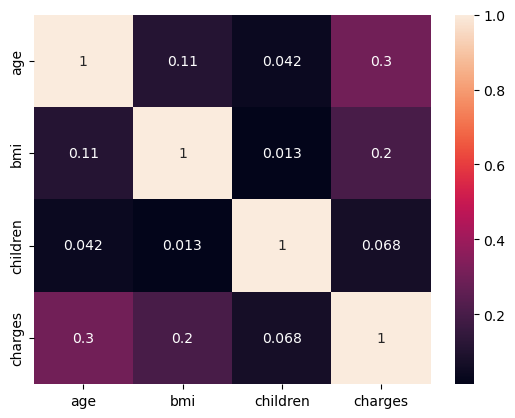

In [196]:
sns.heatmap(Insurance.corr(),annot=True)

## from above we can see a good corelation between children and charges
people with greater number of children have to pay low charges

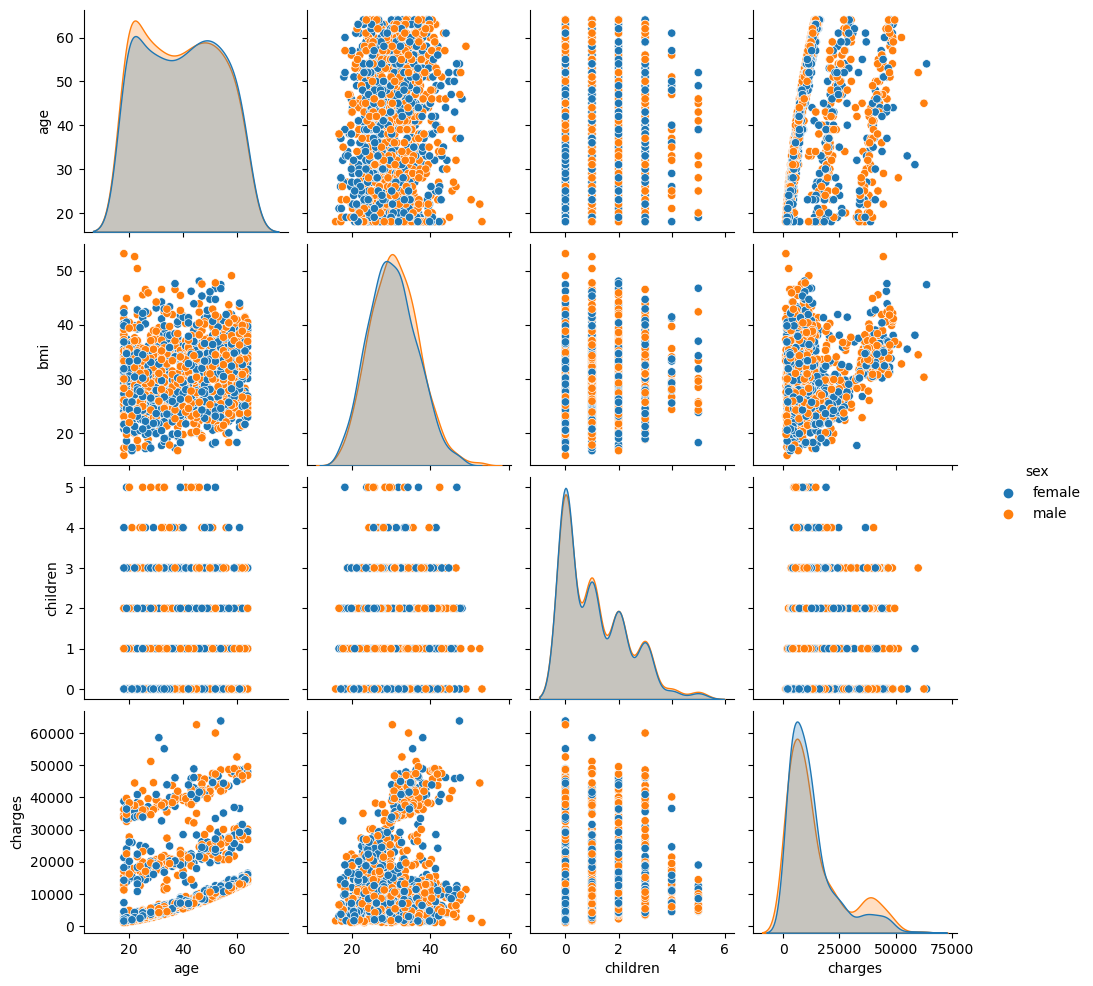

In [197]:
sns.pairplot(Insurance,hue='sex',data=Insurance)

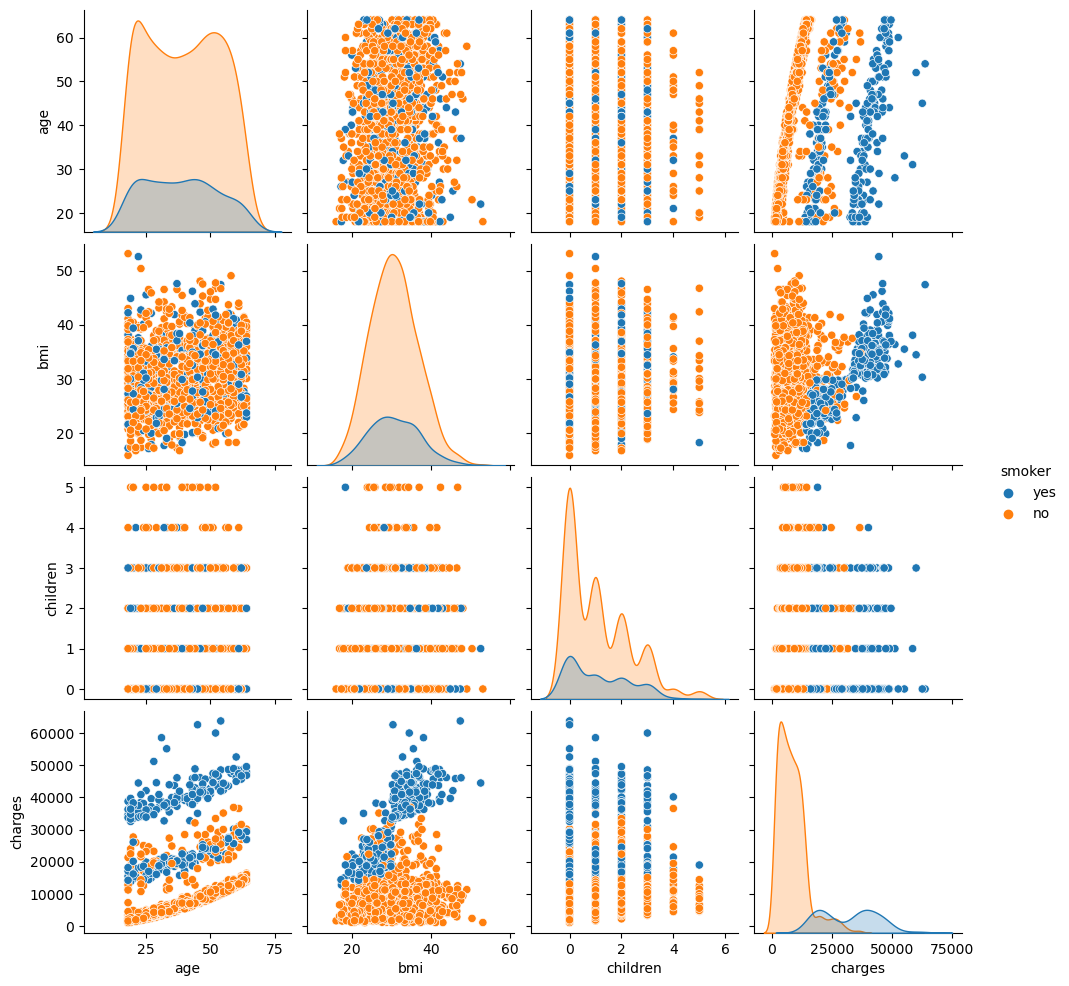

In [198]:
sns.pairplot(Insurance,hue='smoker',data=Insurance)

#### This graph makes it clear to see that Smokers and non Smokers are not charged the same for the health insurance policies.

## removing outliers

In [199]:
px.box(x=Insurance.charges)

In [200]:
# Outliers in charges

len(Insurance.charges.value_counts())

1337

In [201]:
Insurance=Insurance[Insurance['charges']<=15000]

In [202]:
px.box(x=Insurance.charges)

<AxesSubplot:xlabel='bmi'>

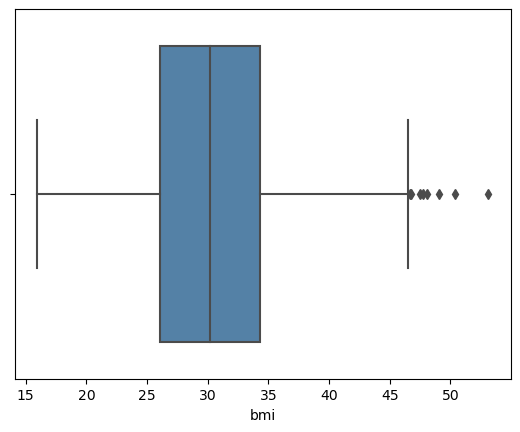

In [203]:
sns.boxplot(x='bmi',color='steelblue',data=Insurance)

In [204]:
Insurance=Insurance[Insurance['bmi']<=45]

<AxesSubplot:xlabel='bmi'>

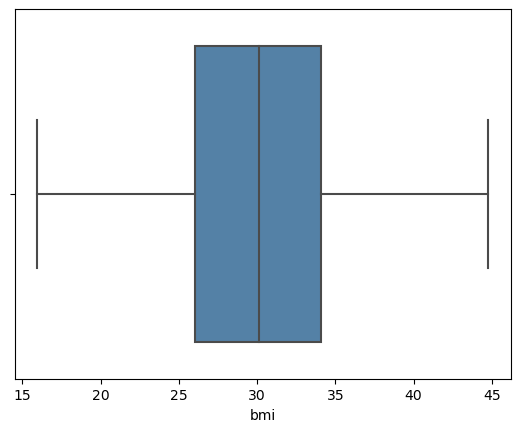

In [205]:
sns.boxplot(x='bmi',color='steelblue',data=Insurance)

In [206]:
len(Insurance[Insurance['charges']<=15000])

965

In [207]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 1 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       965 non-null    int64  
 1   sex       965 non-null    object 
 2   bmi       965 non-null    float64
 3   children  965 non-null    int64  
 4   smoker    965 non-null    object 
 5   region    965 non-null    object 
 6   charges   965 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 60.3+ KB


<AxesSubplot:xlabel='charges', ylabel='Density'>

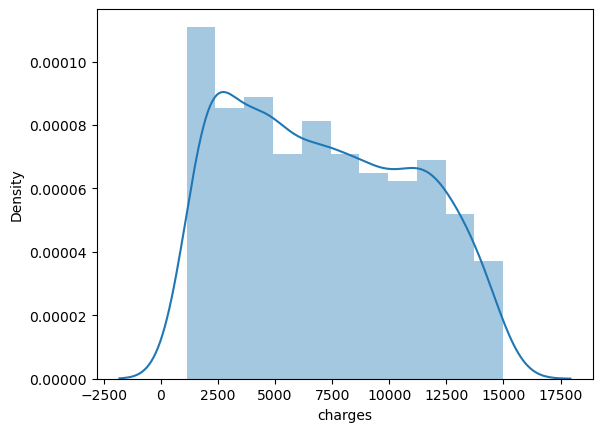

In [208]:
sns.distplot(Insurance['charges'])

## after removing outliers charges distribution

<AxesSubplot:xlabel='bmi', ylabel='Density'>

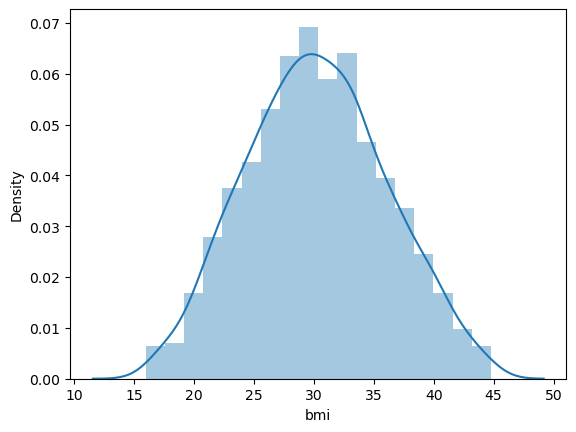

In [209]:
sns.distplot(Insurance['bmi'])

## after removing outliers bmi distribution

## now data is clean

In [210]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline,make_pipeline


## our target variable is charges so its a continuous values so i have close Regression Algorithm

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [212]:
# Splitting the data

X = Insurance[['age','sex','region','children','smoker','bmi']]
y = Insurance[['charges']]

In [213]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

## Onehotencoding and pineline with column_transformer for categorical data

In [214]:
oho = OneHotEncoder()
oho.fit(X[['sex','smoker','region']])
oho.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [215]:
column_trans= make_column_transformer((OneHotEncoder(categories=oho.categories_),['sex','smoker','region']),remainder='passthrough')

In [216]:
lr=LinearRegression()
DTR=DecisionTreeRegressor()
ETR=ExtraTreesRegressor()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()

In [217]:
pipe=make_pipeline(column_trans,lr)
pipe2=make_pipeline(column_trans,DTR)
pipe3=make_pipeline(column_trans,ETR)
pipe4=make_pipeline(column_trans,RFR)
pipe5=make_pipeline(column_trans,GBR)


In [218]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['female', 'male'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object),
                                                                            array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linearregression', LinearRegression())])

In [219]:
pipe2.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['female', 'male'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object),
                                                                            array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [220]:
pipe3.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['female', 'male'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object),
                                                                            array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('extratreesregressor', ExtraTreesRegressor())])

In [221]:
pipe4.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['female', 'male'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object),
                                                                            array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [222]:
pipe5.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['female', 'male'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object),
                                                                            array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [223]:

y_predlr=pipe.predict(x_test)

2116504.5830091676

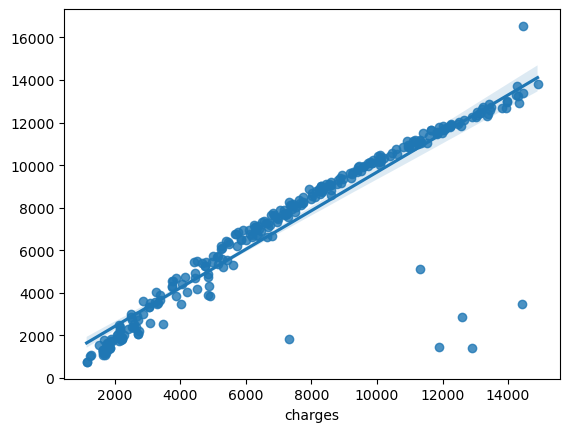

In [224]:
sns.regplot(x=y_test,y=y_predlr)
mean_squared_error(y_test,y_predlr)

In [225]:
y_pred2=pipe2.predict(x_test)

<AxesSubplot:xlabel='charges'>

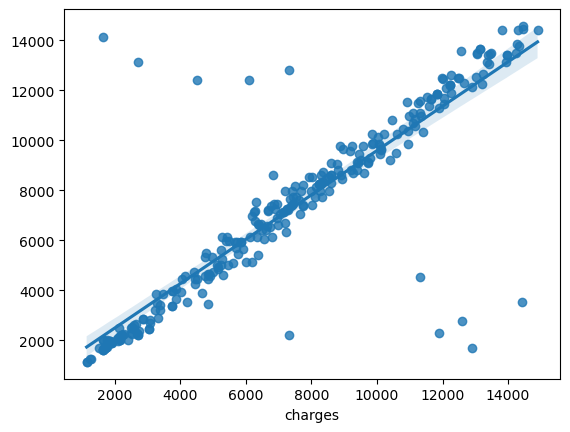

In [226]:
sns.regplot(x=y_test,y=y_pred2)

In [227]:
y_pred3=pipe3.predict(x_test)

<AxesSubplot:xlabel='charges'>

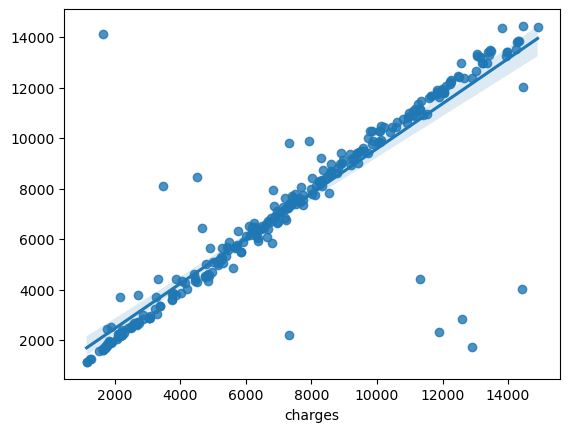

In [228]:
sns.regplot(x=y_test,y=y_pred3)

<AxesSubplot:xlabel='charges'>

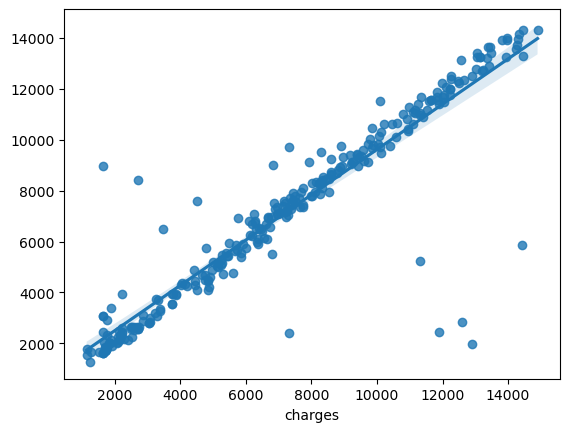

In [229]:
y_pred4=pipe4.predict(x_test)
sns.regplot(x=y_test,y=y_pred4)

<AxesSubplot:xlabel='charges'>

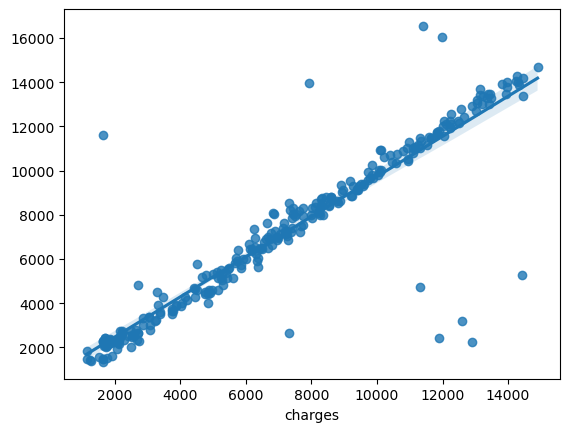

In [230]:
y_pred5=pipe5.predict(x_test)
sns.regplot(x=y_test,y=y_pred5)

In [231]:
print('Linear Regression',r2_score(y_test,y_predlr)*100)

Linear Regression 85.28993802695682


In [232]:
print('DecisionTreeRegressor',r2_score(y_test,y_pred2)*100)

DecisionTreeRegressor 77.12900096493958


In [233]:
print('ExtraTreesRegressor',r2_score(y_test,y_pred3)*100)

ExtraTreesRegressor 82.5287039871856


In [234]:
print('RandomForestRegressor',r2_score(y_test,y_pred4)*100)

RandomForestRegressor 85.61134730993017


In [235]:
print('GradientBoostingRegressor',r2_score(y_test,y_pred5)*100)

GradientBoostingRegressor 84.09005507465761


In [236]:
algo=pd.DataFrame([{'Linear Regression':85.28993802695682,'DecisionTreeRegressor': 80.1991234082223,'ExtraTreesRegressor':  82.84785866051443,'RandomForestRegressor': 85.46021893184759,'GradientBoostingRegressor': 84.90091274507844}])

In [237]:
algo

,Linear Regression,DecisionTreeRegressor,ExtraTreesRegressor,RandomForestRegressor,GradientBoostingRegressor
0,85.289938,80.199123,82.847859,85.460219,84.900913


In [238]:
px.bar(x=algo.keys(),y=algo.value_counts(),data_frame=algo)

## Linear Regression model

In [239]:
pipe.predict(pd.DataFrame([[31,'male',28.500,5,'no','northeast']],columns=['age','sex','bmi','children','smoker','region']))

array([[6685.23374186]])

In [240]:
import pickle

In [241]:
pickle.dump(pipe,open('model.pkl','wb'))